In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import glob
import imageio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('Data/1_monday.csv',sep=';')
# df1['monday']='monday'
df1['new_customer_no'] = df1['customer_no'].astype(str) +'_'+ 'monday'

df2 = pd.read_csv('Data/2_tuesday.csv',sep=';')
# df2['tuesday']='tuesday'
df2['new_customer_no'] = df2['customer_no'].astype(str) +'_'+ 'tuesday'

df3 = pd.read_csv('Data/3_wednesday.csv',sep=';')
# df3['wednesday']='wednesday'
df3['new_customer_no'] = df3['customer_no'].astype(str) +'_'+ 'wednesday'

df4 = pd.read_csv('Data/4_thursday.csv',sep=';')
# df4['thursday']='thursday'
df4['new_customer_no'] = df4['customer_no'].astype(str) +'_'+ 'thursday'

df5 = pd.read_csv('Data/5_friday.csv',sep=';')
# df5['friday']='friday'
df5['new_customer_no'] = df5['customer_no'].astype(str) +'_'+ 'friday'

df = pd.concat([df1,df2,df3,df4,df5], axis=0)
df = df.drop('customer_no',axis=1)
df = df[['timestamp','new_customer_no','location']]
df.rename(columns={'new_customer_no': 'customer_no'}, inplace=True)
df100 = df.copy()
df.head(5)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1_monday,dairy
1,2019-09-02 07:03:00,2_monday,dairy
2,2019-09-02 07:04:00,3_monday,dairy
3,2019-09-02 07:04:00,4_monday,dairy
4,2019-09-02 07:04:00,5_monday,spices


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
# df_new = df.groupby(['customer_no','location'])[['timestamp']].min()
# df_new.reset_index(level=0, inplace=True)
# df_new.reset_index(level=0, inplace=True)

# df_new_1=df_new[df_new['customer_no']=='1_monday']
# df_new_1.sort_values(by='timestamp')
# df_new_1

In [5]:
df_new100 = df.groupby(['customer_no'])[['timestamp']].min()
df_new100.reset_index(level=0, inplace=True)
# df_new100['location'] ='entrance'
# df_new100 = df_new[['timestamp','customer_no','location']]
df_new100.head(5)

,customer_no,timestamp
0,1000_friday,2019-09-06 17:19:00
1,1000_monday,2019-09-02 17:44:00
2,1000_thursday,2019-09-05 17:23:00
3,1000_tuesday,2019-09-03 17:53:00
4,1000_wednesday,2019-09-04 16:53:00


In [6]:
df_new = pd.concat([df,df_new100],axis = 0)
df_new.sort_values('timestamp')

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1_monday,dairy
1,2019-09-02 07:03:00,2_monday,dairy
3001,2019-09-02 07:03:00,1_monday,NaN
3556,2019-09-02 07:03:00,2_monday,NaN
4111,2019-09-02 07:04:00,3_monday,NaN
...,...,...,...
5120,2019-09-06 21:50:00,1500_friday,dairy
5121,2019-09-06 21:50:00,1507_friday,checkout
5122,2019-09-06 21:50:00,1508_friday,checkout
5124,2019-09-06 21:50:00,1510_friday,spices


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df101 =df100.copy()
df101['timestamp'] = pd.to_datetime(df101['timestamp'])
df101 = df101.set_index('timestamp')
df101 = df101.groupby(['customer_no'])[['location']].resample(rule="Min").asfreq().ffill()
df101

location
customer_no timestamp                    
1000_friday 2019-09-06 17:19:00     fruit
            2019-09-06 17:20:00  checkout
1000_monday 2019-09-02 17:44:00     dairy
            2019-09-02 17:45:00     dairy
            2019-09-02 17:46:00     dairy
...                                   ...
9_tuesday   2019-09-03 07:28:00     dairy
            2019-09-03 07:29:00     dairy
            2019-09-03 07:30:00  checkout
9_wednesday 2019-09-04 07:03:00    spices
            2019-09-04 07:04:00  checkout

[53903 rows x 1 columns]

In [9]:
# g['before'] = g['places'].shift(1)
df101['before'] = df101['location'].shift(1)
df101.head(5)

location    before
customer_no timestamp                              
1000_friday 2019-09-06 17:19:00     fruit       NaN
            2019-09-06 17:20:00  checkout     fruit
1000_monday 2019-09-02 17:44:00     dairy  checkout
            2019-09-02 17:45:00     dairy     dairy
            2019-09-02 17:46:00     dairy     dairy

In [10]:
# df = df[df.line_race != 0]
df101 = df101[df101.before != 'checkout']
df102 = df101 


In [11]:
df101['dummy'] = True

<ipython-input-11-e84df85d8f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101['dummy'] = True


In [12]:
df101.dropna().groupby(by=['before','location'])[['dummy']].count().unstack()

dummy                           
location checkout  dairy drinks fruit spices
before                                      
dairy        1825  13098   1044   891    916
drinks       2096    106   5822   856    846
fruit        2555   1221    699  7587    646
spices        941   1213   1024   575   2525

In [13]:
df104 = pd.crosstab( df102.before,df102.location, normalize = 0)
df104

location,checkout,dairy,drinks,fruit,spices
before,,,,,
dairy,0.102678,0.736919,0.058737,0.050129,0.051536
drinks,0.215505,0.010899,0.598602,0.088012,0.086983
fruit,0.201054,0.096081,0.055005,0.597025,0.050834
spices,0.149888,0.193214,0.163109,0.091590,0.402198


In [14]:
df104.reset_index(level=0, inplace=True)
df104

location,before,checkout,dairy,drinks,fruit,spices
0,dairy,0.102678,0.736919,0.058737,0.050129,0.051536
1,drinks,0.215505,0.010899,0.598602,0.088012,0.086983
2,fruit,0.201054,0.096081,0.055005,0.597025,0.050834
3,spices,0.149888,0.193214,0.163109,0.091590,0.402198


In [15]:
# df104 = df104[['before','checkout','dairy','drinks','fruit','spices']]
# df104['location']
# df104
# df105 = df104.set_index('before')
df104.checkout[2]

0.20105445388731508

In [16]:
np.ones((3,3))
np.random.random((3,3))
np.random.normal((3,3))
a = np.random.normal(0.0, 1.0, 10)
a

array([ 0.47422016,  0.72261413,  0.03131685,  0.2223217 ,  0.42974829,
       -0.02756769, -0.09664477, -0.42209062,  1.49572663, -0.94085131])

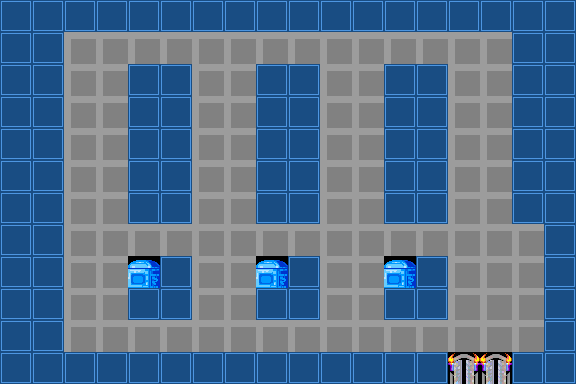

In [17]:
from PIL import Image
import numpy as np

im = Image.open('supermarket.png')
im

In [18]:
from PIL import Image
import numpy as np

im = Image.open('supermarket.png')
market = np.array(im)
print(market.shape, market.dtype)

(384, 576, 3) uint8


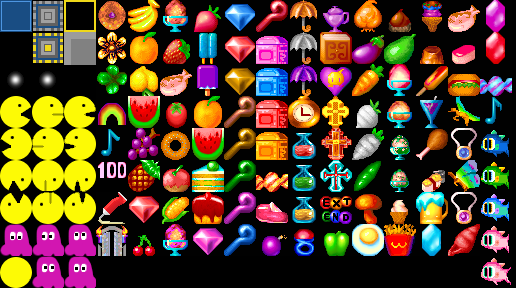

In [19]:
from PIL import Image
import numpy as np

im1= Image.open('tiles.png')
im1

In [20]:
tiles = np.array(im1)
# print(icon.shape, icon.dtype)
x = 4 * 32   # 5th column starting from 0
y = 1 * 32   # 2nd row
apple = tiles[y:y+32, x:x+32]

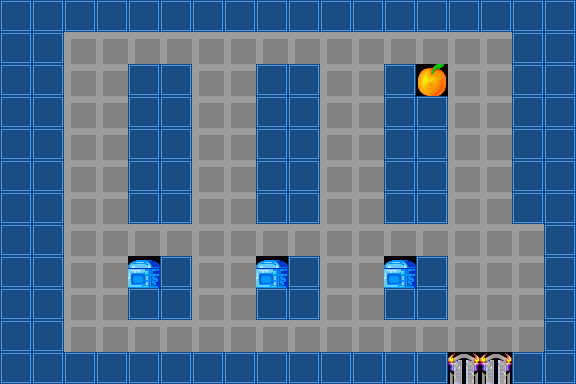

In [21]:
tx = 13 * 32
ty = 2 * 32
market[ty:ty+32, tx:tx+32] = apple
im = Image.fromarray(market)
im

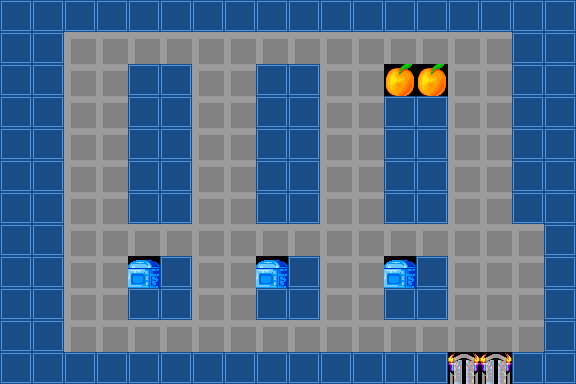

In [22]:
tx = 12 * 32
ty = 2 * 32
market[ty:ty+32, tx:tx+32] = apple
im = Image.fromarray(market)
im

In [23]:
# !pip install opencv-python

In [24]:
c = np.zeros((32 , 32, 3), dtype=np.uint8)
# c

In [25]:
for i in range(1):
    print(i)

0


In [26]:
colors = [0,1,2,3]
new_color = np.random.choice(colors,2)
print(new_color)
unique_colors = np.unique(new_color)
print(unique_colors)
nb_colors_to_change = len(unique_colors)
print(nb_colors_to_change)

[0 3]
[0 3]
2


In [27]:

import cv2
import matplotlib.pyplot as plt
frame = cv2.imread('./images/market.png')

colors = [0,1,2]

new_color = np.random.choice(colors,2)
print(f'new color_comb is: {new_color}')

unique_colors = np.unique(new_color)
print(f'unique color: {unique_colors}')

nb_colors_to_change = len(unique_colors)
print(f'nb_color_to_change {nb_colors_to_change}')

for i in range(nb_colors_to_change):
    id 
    frame[550:640, 730:820, unique_colors[i]] = 0
    print (unique_colors[i])

plt.imshow(frame)

new color_comb is: [1 1]
unique color: [1]
nb_color_to_change 1


TypeError: 'NoneType' object does not support item assignment

In [ ]:
frame[550:640, 730:820, 0] = 0
plt.imshow(frame)

In [ ]:
frame[550:640, 730:820, 2] = 0
plt.imshow(frame)

In [ ]:
for i in range(0):
    print(i)

In [ ]:
unique_colors = np.unique(new_color)
unique_colors

In [ ]:
nb_colors_to_change = len(unique_colors)
nb_colors_to_change